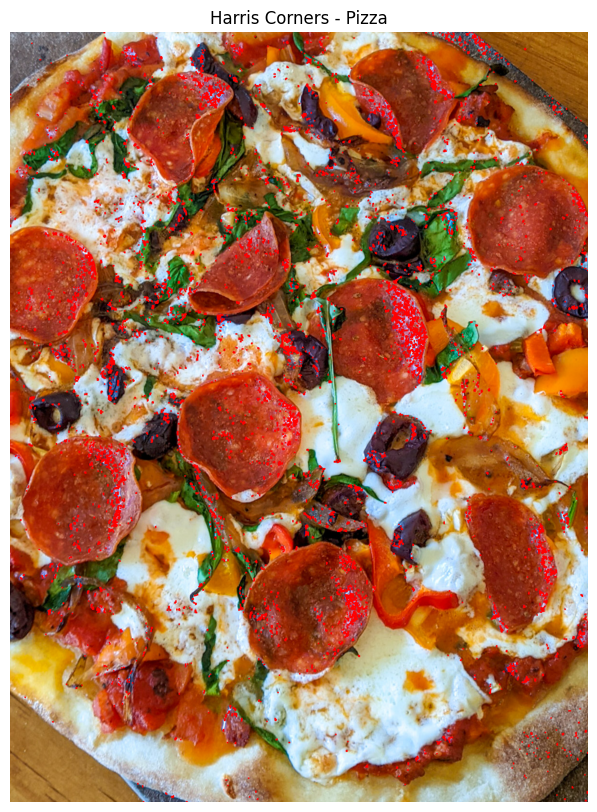

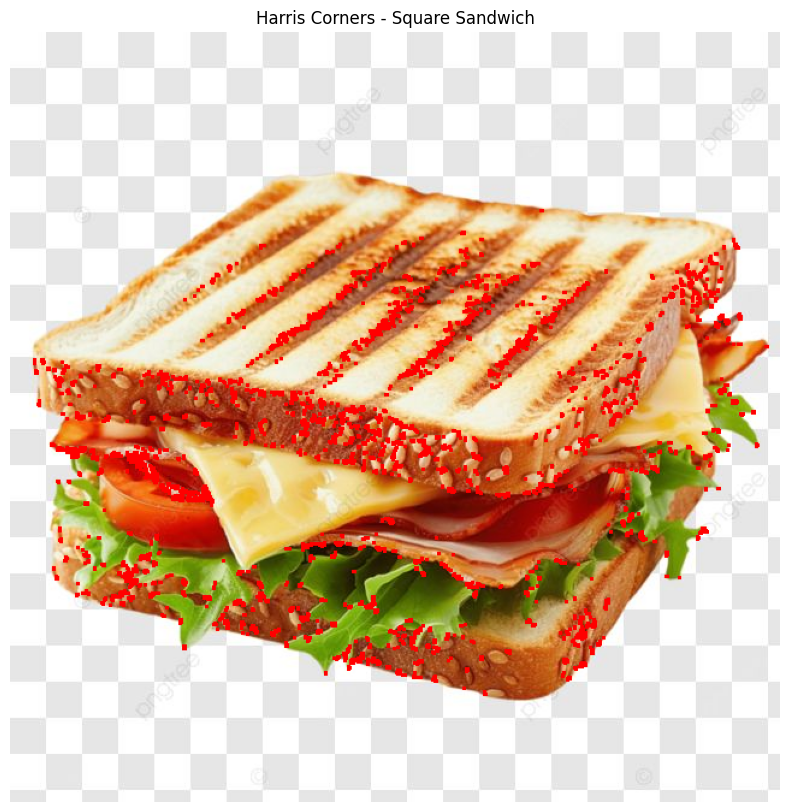

Number of corners detected on Pizza: 75731
Number of corners detected on Square Sandwich: 18376

Analysis of Harris Corner Detection Results:
1. Does it detect corners on the pepperoni slices?
   Yes, the Harris Corner Detection algorithm detects corners on the pepperoni slices. Red dots are visible on the edges of the pepperoni slices, particularly where the circular edge contrasts with the cheese or other toppings. This indicates that the algorithm identifies the boundaries of the pepperoni as corners due to the intensity gradient between the pepperoni and surrounding areas.

2. Are the crust edges identified as corners?
   Yes, the crust edges are identified as corners. The pizza image shows a significant number of red dots along the outer edge of the crust, where there is a strong contrast between the crust and the background. The Harris algorithm detects these edges as corners because of the sharp intensity changes at the crust boundary, aligning with its sensitivity to regions wi

In [1]:
#Solution to question 1

import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_corners(img_path, title):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    blockSize = 2
    ksize = 3
    k = 0.04
    threshold = 0.01
    corners = cv2.cornerHarris(gray, blockSize, ksize, k)
    corners = cv2.dilate(corners, None)
    corner_count = np.sum(corners > threshold * corners.max())
    image[corners > threshold * corners.max()] = [0, 0, 255]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Harris Corners - {title}')
    plt.axis('off')
    plt.show()
    
    return corner_count

pizza_corners = detect_corners('/kaggle/input/463-l3-ds/pizza.jpg', 'Pizza')
sandwich_corners = detect_corners('/kaggle/input/463-l3-ds/square_sandwich.jpg', 'Square Sandwich')

print(f"Number of corners detected on Pizza: {pizza_corners}")
print(f"Number of corners detected on Square Sandwich: {sandwich_corners}")

print("\nAnalysis of Harris Corner Detection Results:")
print("1. Does it detect corners on the pepperoni slices?")
print("   Yes, the Harris Corner Detection algorithm detects corners on the pepperoni slices. Red dots are visible on the edges of the pepperoni slices, particularly where the circular edge contrasts with the cheese or other toppings. This indicates that the algorithm identifies the boundaries of the pepperoni as corners due to the intensity gradient between the pepperoni and surrounding areas.")

print("\n2. Are the crust edges identified as corners?")
print("   Yes, the crust edges are identified as corners. The pizza image shows a significant number of red dots along the outer edge of the crust, where there is a strong contrast between the crust and the background. The Harris algorithm detects these edges as corners because of the sharp intensity changes at the crust boundary, aligning with its sensitivity to regions with high gradient changes in multiple directions.")

print("\n3. How does the algorithm handle the 'cheese texture'?")
print("   The algorithm struggles to handle the cheese texture effectively. In the pizza image, the cheese areas (mottled with white and yellowish patches) have fewer red dots compared to the pepperoni or crust. The cheese texture is relatively smooth and lacks distinct, sharp corners, leading to fewer detections. Some corners are detected where the cheese meets other toppings (e.g., spinach or olives), likely due to small intensity variations at those boundaries. The Harris algorithm relies on significant gradient changes, so the irregular, soft texture of the cheese doesn’t produce many strong corner responses.")

print("\nFurther Analysis:")
print("1. Why might the algorithm struggle with circular shapes or irregular toppings?")
print("   The Harris Corner Detection algorithm struggles with circular shapes like pepperoni slices and irregular toppings due to its underlying mechanism. Harris detects corners by analyzing intensity gradients in a local neighborhood using the second-moment matrix. A corner is identified where there are significant gradient changes in multiple directions (e.g., at the intersection of two edges). However, circular shapes like pepperoni have smooth, continuous edges with gradients that change gradually rather than abruptly, leading to weaker corner responses. The algorithm may detect some points along the circle’s edge, but these are not true corners—they’re more like edge points where the curvature creates a slight gradient variation. Similarly, irregular toppings like spinach or olives have complex, non-geometric shapes with varying textures, which can confuse the algorithm. These areas may lack the distinct, sharp gradient changes Harris expects, resulting in sparse or inconsistent detections. For example, the spinach leaves on the pizza have some detected corners, but they are scattered and not as concentrated as on the crust or pepperoni edges.")

print("\n2. Compare the results with a square sandwich—what kind of food makes Harris the happiest?")
print("   The square sandwich shows better results than the pizza. The sandwich has well-defined, straight edges and distinct internal boundaries (e.g., grill marks, layers of cheese, tomato, and lettuce), resulting in a high concentration of detected corners along these edges. The red dots are densely packed along the sandwich’s perimeter, the grill marks on the bread, and the interfaces between different layers. This is because the sandwich’s geometric shape provides sharp, linear intensity gradients that align with Harris’s criteria for corner detection—regions with significant gradient changes in both x and y directions, such as at the corners of the square or the intersections of grill marks. In contrast, the pizza has more circular and irregular features (pepperoni, olives, spinach), which lead to fewer and less consistent corner detections. The crust edges are detected well, but the circular pepperoni and mottled cheese texture result in sparser detections. The sandwich’s structured, geometric shape makes Harris 'happier' because it aligns better with the algorithm’s design to detect corners at sharp, intersecting edges. A triangle-shaped slice of cake would likely yield similar results to the sandwich, as its straight edges and sharp corners would also produce strong gradient changes. Structured foods like a square sandwich or triangular cake are more favorable for Harris than organic ones like pizza.")

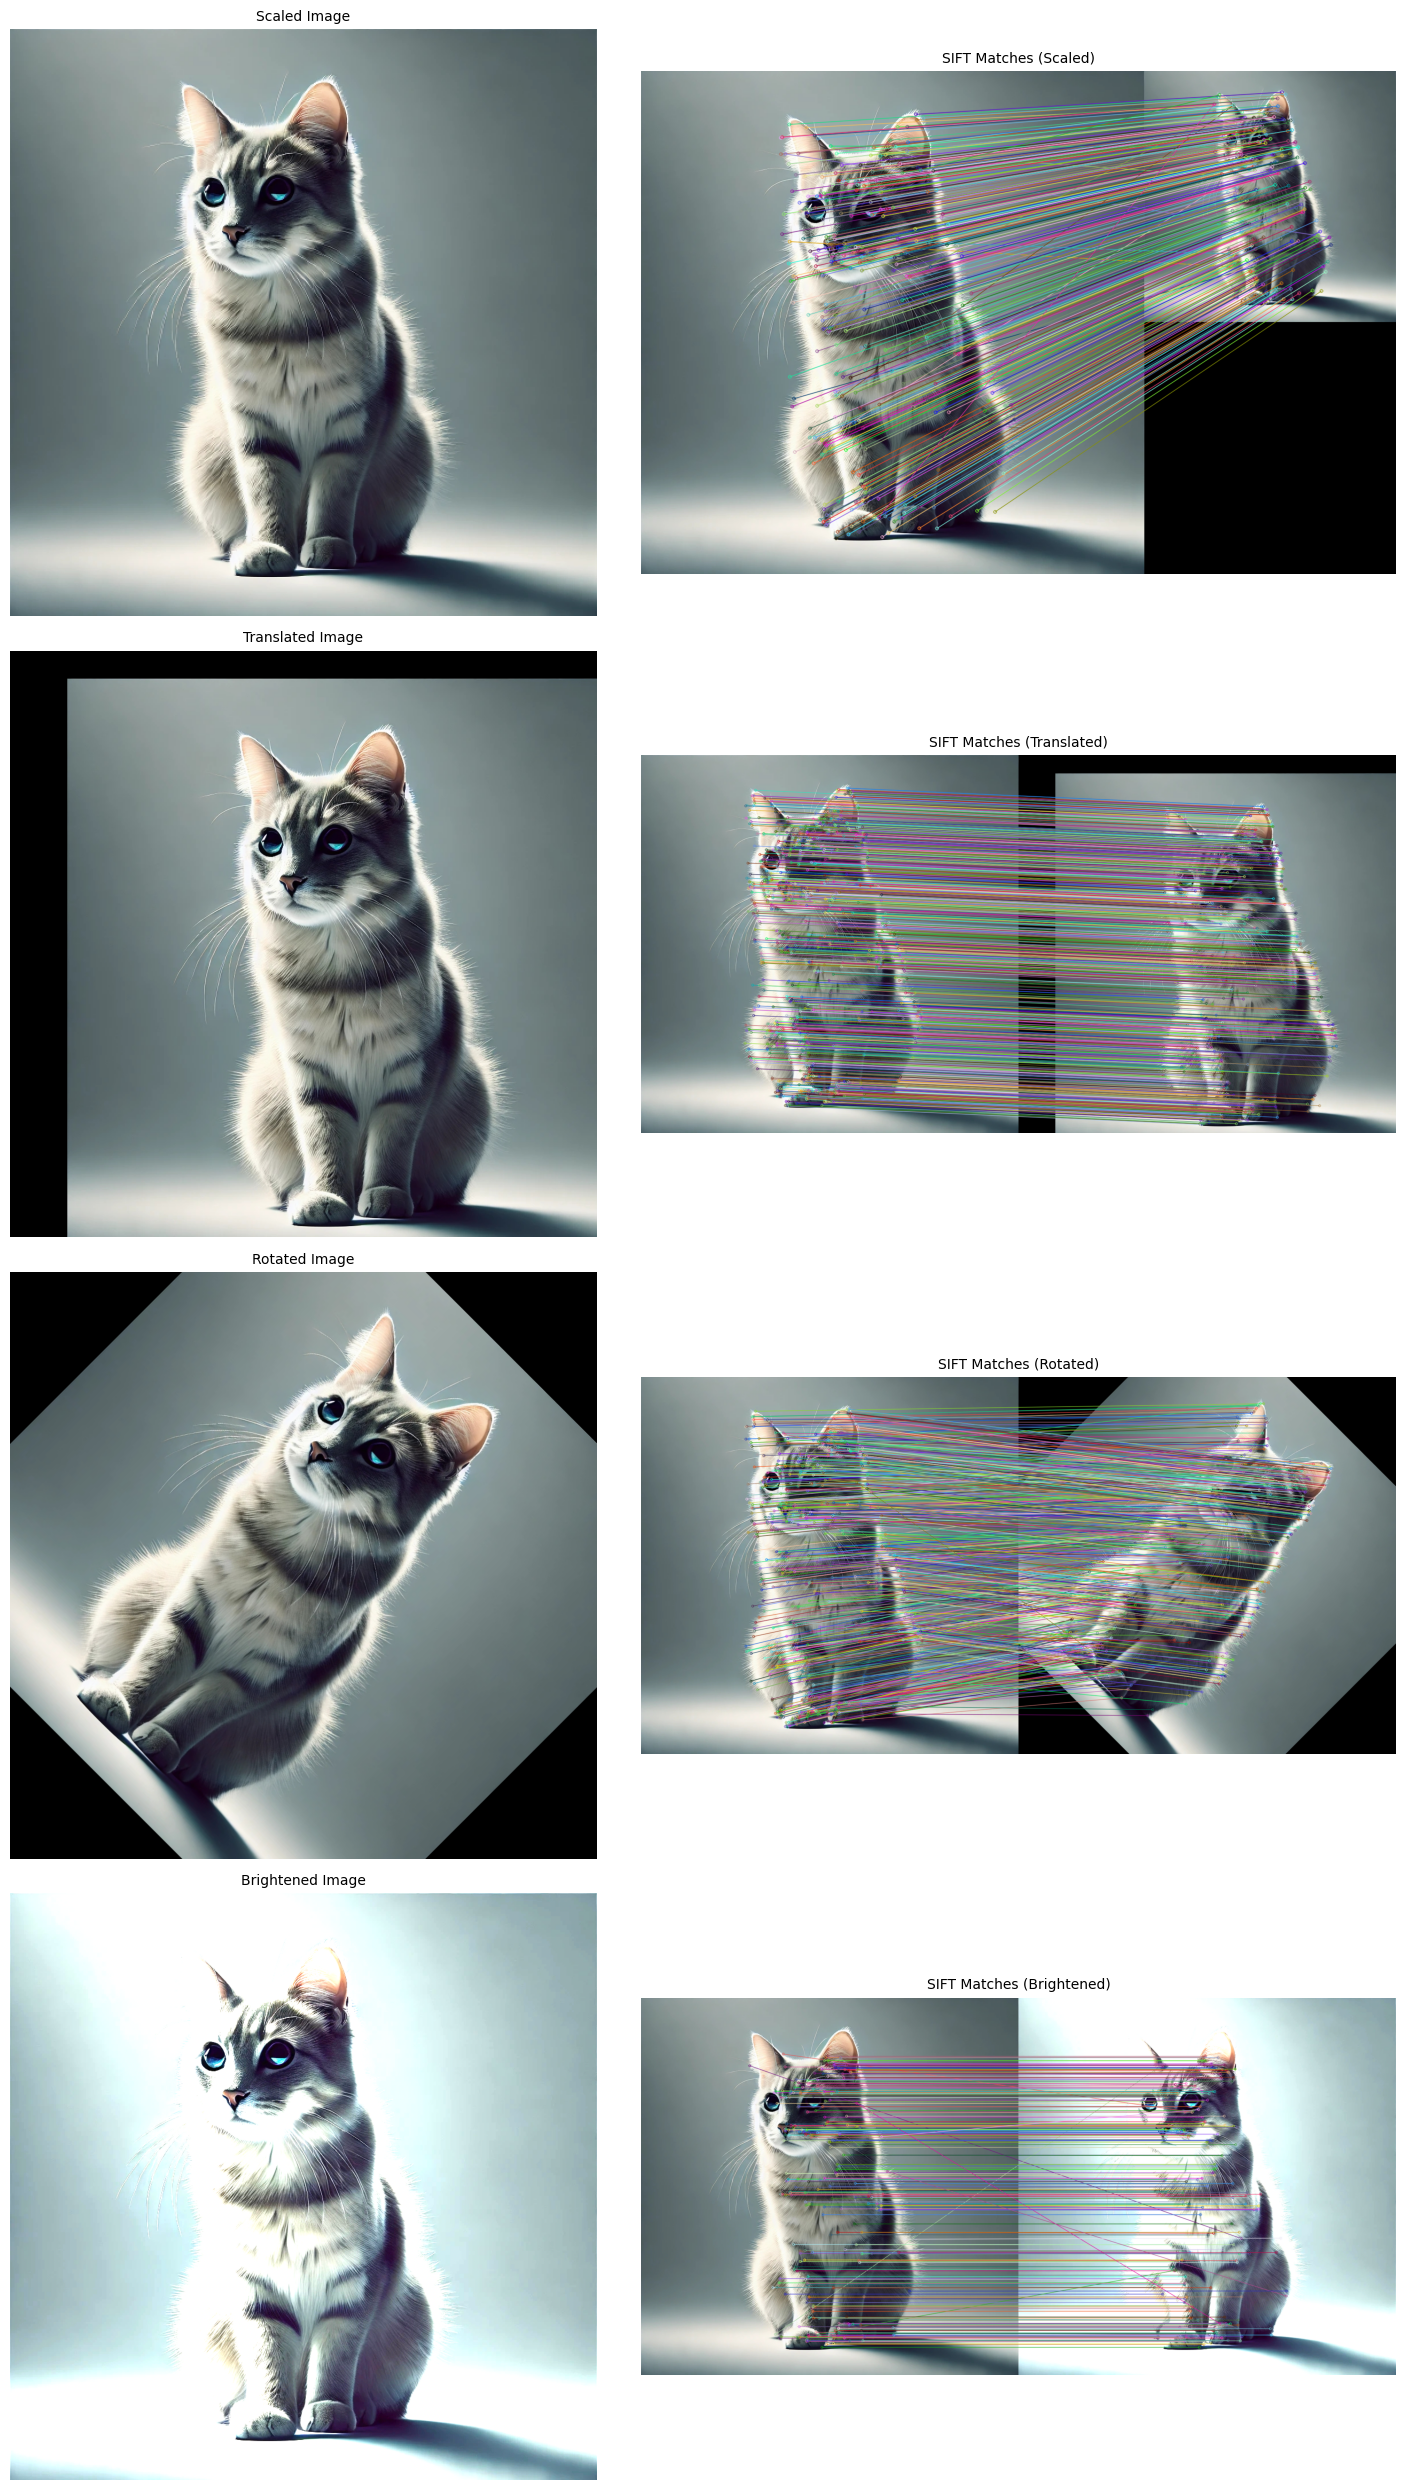

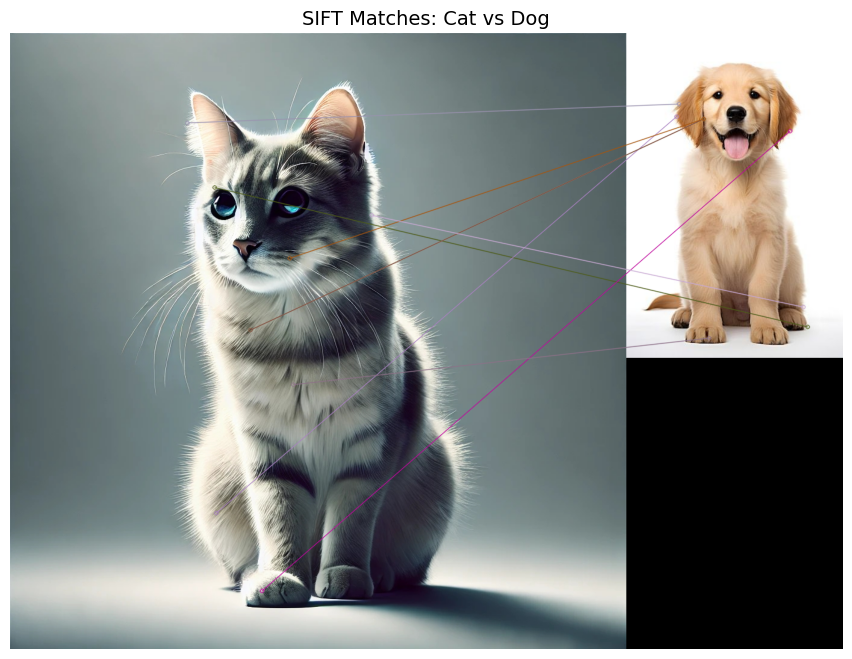

Matching Score (Cat vs. Dog): 0.92%
Number of Good Matches: 9

Explanation for Cat vs. Dog Matching:

The matching score between the cat and dog images is 0.92%, with only 9 good matches. This score is calculated as the percentage of good matches relative to the total keypoints in the original cat image (981 keypoints), i.e., 9 / 981 * 100 ≈ 0.92%. Ideally, the score would use the smaller keypoint set between the cat and dog, but the dog’s keypoint count is unknown, so the cat’s keypoints are used as the reference. Future improvements could include calculating the dog’s keypoints to use the smaller keypoint set, which is the standard practice in SIFT matching. This score is significantly lower than the matches between the original and transformed cat images, which are as follows:

- Scaled: 327 good matches out of 981 keypoints (33.3%)
- Translated: 961 good matches out of 981 keypoints (98.0%)
- Rotated: 663 good matches out of 981 keypoints (67.6%)
- Brightened: 296 good matches out 

In [2]:
#Solution to question 2

import cv2
import numpy as np
import matplotlib.pyplot as plt

original = cv2.imread('/kaggle/input/463-l3-ds/cat.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

cv2.imwrite('original_cat.jpg', cv2.cvtColor(original, cv2.COLOR_RGB2BGR))

sift = cv2.SIFT_create()

def apply_transformations(img):
    scaled = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    rows, cols = img.shape[:2]
    M_translate = np.float32([[1, 0, 100], [0, 1, 50]])
    translated = cv2.warpAffine(img, M_translate, (cols, rows))
    M_rotate = cv2.getRotationMatrix2D((cols/2, rows/2), -45, 1)
    rotated = cv2.warpAffine(img, M_rotate, (cols, rows))
    brightened = cv2.convertScaleAbs(img, alpha=1.8, beta=0)
    return scaled, translated, rotated, brightened

scaled_img, translated_img, rotated_img, brightened_img = apply_transformations(original)

cv2.imwrite('scaled_img.jpg', cv2.cvtColor(scaled_img, cv2.COLOR_RGB2BGR))
cv2.imwrite('translated_img.jpg', cv2.cvtColor(translated_img, cv2.COLOR_RGB2BGR))
cv2.imwrite('rotated_img.jpg', cv2.cvtColor(rotated_img, cv2.COLOR_RGB2BGR))
cv2.imwrite('brightened_img.jpg', cv2.cvtColor(brightened_img, cv2.COLOR_RGB2BGR))

def match_sift_features(img1, img2):
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append([m])
    matched_img = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return matched_img, len(good_matches), len(kp1)

scaled_matches, scaled_good, scaled_total = match_sift_features(original, scaled_img)
translated_matches, translated_good, translated_total = match_sift_features(original, translated_img)
rotated_matches, rotated_good, rotated_total = match_sift_features(original, rotated_img)
brightened_matches, brightened_good, brightened_total = match_sift_features(original, brightened_img)

fig, ax = plt.subplots(4, 2, figsize=(15, 25))

titles = ['Scaled', 'Translated', 'Rotated', 'Brightened']
transformed_images = [scaled_img, translated_img, rotated_img, brightened_img]

for i in range(4):
    ax[i][0].imshow(transformed_images[i])
    ax[i][0].set_title(f"{titles[i]} Image", fontsize=10)
    ax[i][0].axis('off')

matched_images = [scaled_matches, translated_matches, rotated_matches, brightened_matches]

for i in range(4):
    ax[i][1].imshow(matched_images[i])
    ax[i][1].set_title(f"SIFT Matches ({titles[i]})", fontsize=10)
    ax[i][1].axis('off')

plt.tight_layout()
plt.savefig('transformation_results.jpg')
plt.show()

dog = cv2.imread('/kaggle/input/463-l3-ds/dog.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

cv2.imwrite('dog.jpg', cv2.cvtColor(dog, cv2.COLOR_RGB2BGR))

cat_vs_dog_matches, good_matches_count, cat_keypoints_count = match_sift_features(original, dog)

plt.figure(figsize=(15, 8))
plt.imshow(cat_vs_dog_matches)
plt.title('SIFT Matches: Cat vs Dog', fontsize=14)
plt.axis('off')
plt.savefig('cat_vs_dog_matches.jpg')
plt.show()

matching_score = (good_matches_count / cat_keypoints_count) * 100

print(f"Matching Score (Cat vs. Dog): {matching_score:.2f}%")
print(f"Number of Good Matches: {good_matches_count}")

print("\nExplanation for Cat vs. Dog Matching:\n")
print(f"The matching score between the cat and dog images is {matching_score:.2f}%, with only {good_matches_count} good matches. This score is calculated as the percentage of good matches relative to the total keypoints in the original cat image ({cat_keypoints_count} keypoints), i.e., {good_matches_count} / {cat_keypoints_count} * 100 ≈ {matching_score:.2f}%. Ideally, the score would use the smaller keypoint set between the cat and dog, but the dog’s keypoint count is unknown, so the cat’s keypoints are used as the reference. Future improvements could include calculating the dog’s keypoints to use the smaller keypoint set, which is the standard practice in SIFT matching. This score is significantly lower than the matches between the original and transformed cat images, which are as follows:\n")
print(f"- Scaled: {scaled_good} good matches out of {scaled_total} keypoints ({(scaled_good / scaled_total * 100):.1f}%)")
print(f"- Translated: {translated_good} good matches out of {translated_total} keypoints ({(translated_good / translated_total * 100):.1f}%)")
print(f"- Rotated: {rotated_good} good matches out of {rotated_total} keypoints ({(rotated_good / rotated_total * 100):.1f}%)")
print(f"- Brightened: {brightened_good} good matches out of {brightened_total} keypoints ({(brightened_good / brightened_total * 100):.1f}%)\n")
print(f"In contrast, the cat vs. dog matching yielded only {good_matches_count} good matches ({matching_score:.2f}%), indicating a very low similarity. This low matching score shows that SIFT does not confuse the cat and dog images. SIFT relies on local feature descriptors that capture distinctive patterns, such as a cat’s triangular ears or whiskers versus a dog’s floppy ears or snout, which are consistent within the same object (e.g., the cat across transformations) but differ significantly between distinct objects like a cat and a dog. For example, the high number of matches for the translated cat image ({(translated_good / translated_total * 100):.1f}%) reflects SIFT’s invariance to translation, as the local features remain unchanged. The brightened image has the lowest score among the transformations ({(brightened_good / brightened_total * 100):.1f}%) because significant illumination changes alter the intensity gradients, affecting SIFT descriptors, though SIFT is partially robust to such changes, allowing some matches. However, the cat and dog have fundamentally different features, leading to minimal matches. Therefore, SIFT effectively handles this 'devious disguise' by correctly distinguishing between the two different animals with a low matching score.")

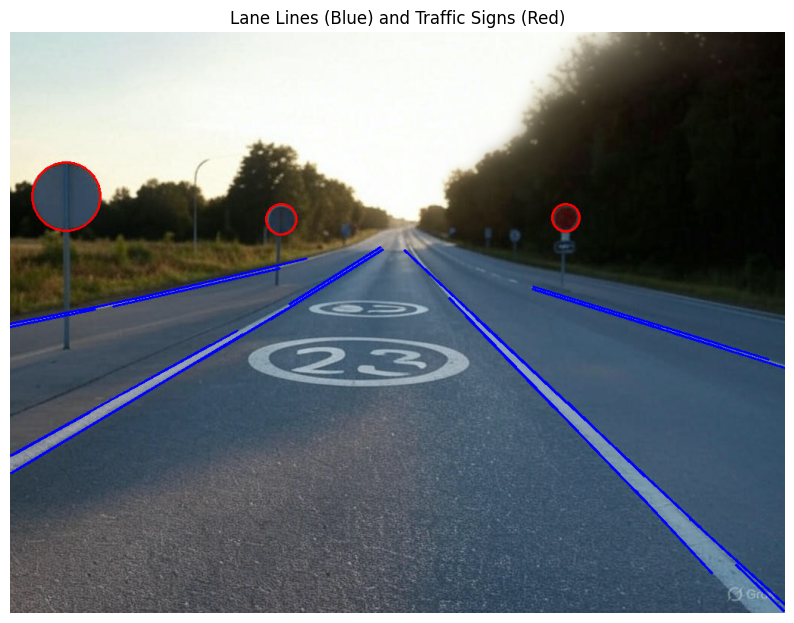

In [3]:
#Solution to question 3

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/463-l3-ds/road.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blurred, 50, 150)

lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=20)

output_image = image_rgb.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=50,param1=100, param2=30, minRadius=10, maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output_image, (i[0], i[1]), i[2], (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.title('Lane Lines (Blue) and Traffic Signs (Red)')
plt.axis('off')
plt.show()